# Lending club case study 

 Objective:Minimizing the risk in lending decisions.This could involve the analysing customer loan data for all loans issued through the time period 2007 to 2011 to identify the most factors associated with credit risk or default
 

# Importing all Necessary Libraries

In [1]:
import warnings # library to show warning messages
import numpy as np # math library
import pandas as pd # to work with datasets
import matplotlib.pyplot as plt # used for plotting simple 2D graphs
import seaborn as sns # visualization library based on matplotlib
import re # library to work on string manipulation


# pandas configures display options to control how data is presented when displaying DataFrames in a Jupyter notebook or other interactive environments
pd.options.display.float_format = '{:.2f}'.format # Ensures floating-point numbers are displayed with two decimal places instead of the default format
pd.options.display.max_columns = None # Removes any limitation on the number of columns displayed when printing a DataFrame.


# we can ignore warnings that arise because of any incompatabile versions
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
loan_data = pd.read_csv("/home/raghavendra/Lenden_club_case-study/loan.csv", low_memory=False)


In [3]:
loan_data.head() # fetching the initial 5 rows


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.00,0.00,11,0,9698,19.40%,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN

# Inspecting

In [5]:
#Check the no of rows and columns
loan_data.shape

(39717, 111)

In [6]:
#checking the columns name and their count in the loaded data
print(loan_data.columns)
num_columns = loan_data.shape[1]
print(f"\nThe number of columns is: {num_columns}")

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

The number of columns is: 111


In [7]:
## shows not null counts and data type of all columns

loan_data.info(verbose = True,show_counts = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [8]:
#provided summary statistics of all columns
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

# Cleaning

In [9]:
#To display the duplicate rows
duplicates = loan_data[loan_data.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# To count the total number of duplicates:
total_duplicates = loan_data.duplicated().sum()
print(f"Total number of duplicate rows: {total_duplicates}")


Duplicate Rows:
Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_b

In [10]:
#Identifying the  missing values
print(loan_data.isna().sum())

#Identify the total missing values
print()
print(f"Total count:",loan_data.isna().sum().sum())


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Total count: 2263366


In [11]:
# Drop columns where all values are NaN and 0
loan_data = loan_data.loc[:, ~((loan_data == 0) | (loan_data.isnull())).all()]
loan_data.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc  

In [12]:
#Displaying the columns and their count after removing the columns who have zeros and null values 
print(loan_data.columns)
num_columns = loan_data.shape[1]
print(f"\nThe number of columns is: {num_columns}")
print(loan_data.shape)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')

The number of columns is: 52
(39717, 52)


In [13]:
loan_data.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_deli

# Filtering

In [14]:
# checking different categorical types of loan statuses
print(loan_data.loan_status.value_counts())

# Observations:
# There are three types of loan_statuses
# 1. Fully Paid - customers have fully paid the loan
# 2. Charged Off - customers have defaulted
# 3. Current - on-going loans 

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [15]:
# Based on the problem statement we only require to consider for better anlaysis of fully paid (or non defaulters) and charged off (defaulters) customers.
# filtering the data  process according to the problem statement to achieve and get more insights, helps us process the data faster 


loan_status_values_require = ['Fully Paid','Charged Off'] 
# Use query method to filter
loan_data = loan_data.query("loan_status in @loan_status_values_require")

# Print the counts of each loan status
print(loan_data['loan_status'].value_counts())

# Print the shape of the filtered DataFrame
print(loan_data.shape)


#Observations:

# 1. Loan dataframe has only fully paid and charged off customers so making sense to compare and make decision making factors.
# 2. Number of rows has reduced from 39717 to 38577 - although the size reduction of columns gradually decreased more to work efficiently after cleaned up 

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64
(38577, 52)


# Removing the maximum null values occur in the columns

In [16]:
#Most Often in the IT industry if any missing values or null values having more than 30% then we can remove the columns to maintain data quality and reduce noise in datasets.


threshold = 0.3

# Calculate the percentage of null values in each column
null_percentages = loan_data.isnull().mean()

# Identify columns to drop
columns_to_drop = null_percentages[null_percentages >= threshold].index
print(list(columns_to_drop))

# Drop the identified columns
loan_data = loan_data.drop(columns=columns_to_drop)
loan_data.shape

#Observations:
#After running the snippet, we observed that the row and column counts remained the same as before, even after dropping columns where all values are NaN or 0. This indicates that there are no columns with null values exceeding 30%.

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


(38577, 48)

In [17]:
# Checking summary statistics again for all columns regardless of their data type to get rid of unwanted columns for EDA

loan_data.describe(include="all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577,38577,38577.00,38577,38577,36191,37544,38577,38577.00,38577,38577,38577,38577,38577,38577,38566,38577,38577,38577.00,38577.00,38577,38577.00,38577.00,38577.00,38577.00,38527,38577.00,38577,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38506,38577.00,38575,38577.00,38577,37880.00
unique,NaN,NaN,NaN,NaN,NaN,2,370,NaN,7,35,28027,11,5,NaN,3,55,2,1,38577,14,19297,822,50,NaN,NaN,524,NaN,NaN,NaN,NaN,1088,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,106,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,A4,US Army,10+ years,RENT,NaN,Not Verified,Nov-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Oct-99,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar-13,NaN,May-16,NaN,INDIVIDUAL,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,913,NaN,11675,2873,131,8488,18480,NaN,16694,2062,32950,38577,1,18055,2090,583,6949,NaN,NaN,360,NaN,NaN,NaN,NaN,954,NaN,38577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026,NaN,9333,NaN,38577,NaN
mean,676378.71,842284.34,11047.03,10784.06,10222.48,NaN,NaN,322.47,NaN,NaN,NaN,NaN,NaN,68777.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.27,0.15,NaN,0.87,9.28,0.06,13289.49,NaN,22.05,NaN,0.00,0.00,11866.97,11271.20,9648.32,2119.24,1.37,98.04,12.77,NaN,2746.24,NaN,1.00,NaN,0.04
std,209263.90,264451.93,7348.44,7090.31,7022.72,NaN,NaN,208.64,NaN,NaN,NaN,NaN,NaN,64218.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.67,0.49,NaN,1.07,4.40,0.24,15866.49,NaN,11.43,NaN,0.00,0.00,8809.86,8700.85,7009.38,2389.50,7.32,698.65,150.84,NaN,4494.65,NaN,0.00,NaN,0.20
min,54734.00,70699.00,500.00,500.00,0.00,NaN,NaN,15.69,NaN,NaN,NaN,NaN,NaN,4000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,2.00,0.00,0.00,NaN,2.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,1.00,NaN,0.00
25%,512033.00,661131.00,5300.00,5200.00,5000.00,NaN,NaN,165.74,NaN,NaN,NaN,NaN,NaN,40000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.13,0.00,NaN,0.00,6.00,0.00,3650.00,NaN,13.00,NaN,0.00,0.00,5513.50,5019.59,4500.00,643.99,0.00,0.00,0.00,NaN,217.42,NaN,1.00,NaN,0.00
50%,656423.00,839292.00,9600.00,9550.00,8733.44,NaN,NaN,277.86,NaN,NaN,NaN,NaN,NaN,58868.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.37,0.00,NaN,1.00,9.00,0.00,8762.00,NaN,20.00,NaN,0.00,0.00,9674.05,9066.66,8000.00,1300.45,0.00,0.00,0.00,NaN,568.26,NaN,1.00,NaN,0.00
75%,829146.00,1037336.00,15000.00,15000.00,14000.00,NaN,NaN,425.55,NaN,NaN,NaN,NaN,NaN,82000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.56,0.00,NaN,1.00,12.00,0.00,16912.00,NaN,29.00,NaN,0.00,0.00,16136.95,15329.78,13175.00,2671.98,0.00,0.00,0.00,NaN,3447.25,NaN,1.00,NaN,0.00


In [18]:
#Observations from the above summary statistics to remove unnecessary columns based on specific criteria.

def clean_loan_data(df):
    # Remove high cardinality columns where the number of unique values is very close to the total number of rows 
    high_cardinality_cols = [
        col for col in df.columns 
        if df[col].nunique() > 0.9 * len(df)
    ]
    df = df.drop(columns=high_cardinality_cols)
    
    # Remove low variability columns where all the values are identical and also no useful information for analysis or modeling.
    low_variability_cols = [
        col for col in df.columns 
        if df[col].nunique() == 1
    ]
    df = df.drop(columns=low_variability_cols)
    
    # Remove mostly zero/null columns where more than 90% of the values are either 0 or NaN.
    mostly_zero_null_cols = [
        col for col in df.columns 
        if (df[col] == 0).sum() + df[col].isnull().sum() > 0.9 * len(df)
    ]
    df = df.drop(columns=mostly_zero_null_cols)
    
    # Remove irrelevant columns (predefined) since focus is on identifying pre-approval factors that can predict loan defaults.
    irrelevant_columns = ['last_credit_pull_d', 'url', 'desc', 'emp_title','last_pymnt_d','last_pymnt_amnt','total_pymnt','total_rec_int','total_rec_late_fee','total_rec_prncp','recoveries','revol_bal','collection_recovery_fee','total_pymnt_inv']
    df = df.drop(columns=[col for col in irrelevant_columns if col in df.columns])
    
    return df

# Apply the cleaning function
loan_data = clean_loan_data(loan_data)
loan_data.shape

(38577, 25)

In [19]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_util',
       'total_acc'],
      dtype='object')

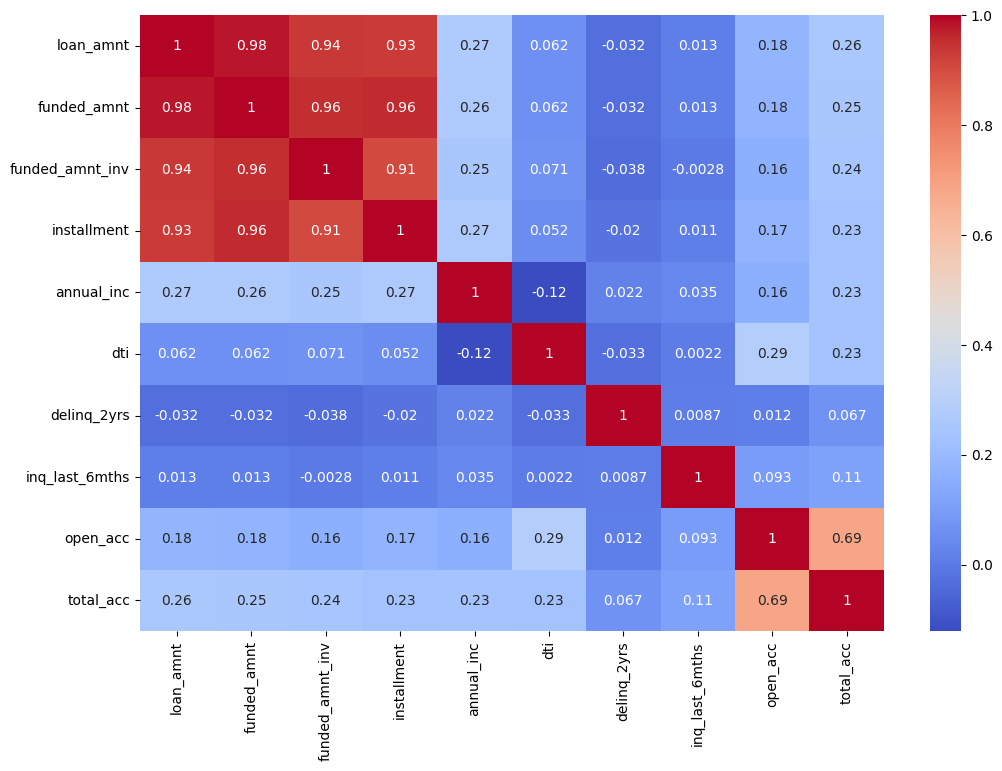

Columns with high correlation (>0.9) that will be removed:
{'installment', 'funded_amnt', 'funded_amnt_inv'}
(38577, 22)


In [20]:
#observations:
#Also noticed that Columns such as funded_amnt, loan_amnt, and installment may be highly correlated, as they represent similar information. Keeping one of them would be enough for modeling.
#Reduced the multicollinearity from the high correlation between certain columns

# Select only numeric columns for correlation matrix
numeric_data = loan_data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))


# Plot a heatmap with Seaborn to visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify columns with correlation above 0.9
corr_threshold = 0.9
high_corr_cols = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            high_corr_cols.add(colname)

print("Columns with high correlation (>0.9) that will be removed:")
print(high_corr_cols)

# Drop highly correlated columns
loan_data = loan_data.drop(columns=high_corr_cols)
print(loan_data.shape)

# Data Imputation and Conversion to handle datatype in required format

In [21]:
# Calculate the percentage of missing values for each column
missing_value_df = loan_data.isnull().mean() * 100


# Convert to DataFrame for better visualization
missing_value_df = missing_value_df.reset_index()
missing_value_df.columns = ['column_name', 'percent_missing']

# Display columns with missing values greater than 0%
missing_value_df[missing_value_df.percent_missing > 0]

,column_name,percent_missing
5,emp_length,2.68
12,title,0.03
20,revol_util,0.13


In [22]:
# Observations:
# 1. We can remove symbols like 'years' and convert them to numerical format.
loan_data['emp_length'] = loan_data.emp_length.str.extract('(\d+)')
# 2. Missing values in 'emp_length' will be filled with the mode value (assumed '10 years' as mode).
print(loan_data['emp_length'].mode())
loan_data.emp_length.fillna('10', inplace=True)
# Get distinct values of 'emp_length' to understand the data
loan_data["emp_length"].value_counts()

0    10
Name: emp_length, dtype: object


emp_length
10    9521
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [23]:
# Fill missing values in 'revol_util' with 0, as it's a percentage of credit utilization
loan_data.revol_util.fillna('0', inplace=True)

# Remove the '%' symbol and convert to numeric values
loan_data['revol_util'] = loan_data.revol_util.str.replace('%', '')
#loan_data["revol_util"].value_counts()

In [24]:
# Check distinct values in 'title'
loan_data["title"].value_counts()

# Observation:
# Missing values in 'title' can be imputed with empty string
loan_data.title.fillna('', inplace=True)


In [25]:
# Remove '%' from 'int_rate' column and convert to numeric values
loan_data['int_rate'] = loan_data.int_rate.str.replace('%', '')
#loan_data["int_rate"].value_counts()

In [26]:
# Convert selected columns to numeric types
conversion_columns = ['int_rate', 'revol_util', 'emp_length']
loan_data[conversion_columns] = loan_data[conversion_columns].apply(pd.to_numeric)

In [27]:
# Convert 'issue_d' to datetime format and extract year and month
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')

# Create separate year and month columns from 'issue_d'
loan_data['issue_d_year'] = loan_data['issue_d'].dt.year
loan_data['issue_d_month'] = loan_data['issue_d'].dt.month


In [28]:
loan_data.head()  # Display the first few rows of the transformed data


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,issue_d_year,issue_d_month
0,5000,36 months,10.65,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,83.70,9,2011,12
1,2500,60 months,15.27,C,C4,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,9.40,4,2011,12
2,2400,36 months,15.96,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,98.50,10,2011,12
3,10000,36 months,13.49,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,21.00,37,2011,12
5,5000,36 months,7.90,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,28.30,12,2011,12


# EDA process begins

In [29]:
loan_data.describe(include='all') # provide summary statistics of all columns

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,issue_d_year,issue_d_month
count,38577.00,38577,38577.00,38577,38577,38577.00,38577,38577.00,38577,38577,38577,38577,38577,38577,38577,38577.00,38577.00,38577,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00
unique,NaN,2,NaN,7,35,NaN,5,NaN,3,NaN,2,14,19298,822,50,NaN,NaN,524,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,36 months,NaN,B,A4,NaN,RENT,NaN,Not Verified,NaN,Fully Paid,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Oct-99,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,29096,NaN,11675,2873,NaN,18480,NaN,16694,NaN,32950,18055,2090,583,6949,NaN,NaN,360,NaN,NaN,NaN,NaN,NaN,NaN
mean,11047.03,NaN,11.93,NaN,NaN,5.19,NaN,68777.97,NaN,2010-10-25 23:47:14.030640128,NaN,NaN,NaN,NaN,NaN,13.27,0.15,NaN,0.87,9.28,48.64,22.05,2010.31,7.11
min,500.00,NaN,5.42,NaN,NaN,1.00,NaN,4000.00,NaN,2007-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,2.00,0.00,2.00,2007.00,1.00
25%,5300.00,NaN,8.94,NaN,NaN,2.00,NaN,40000.00,NaN,2010-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,8.13,0.00,NaN,0.00,6.00,25.10,13.00,2010.00,4.00
50%,9600.00,NaN,11.71,NaN,NaN,4.00,NaN,58868.00,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,13.37,0.00,NaN,1.00,9.00,49.00,20.00,2011.00,7.00
75%,15000.00,NaN,14.38,NaN,NaN,9.00,NaN,82000.00,NaN,2011-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,18.56,0.00,NaN,1.00,12.00,72.20,29.00,2011.00,10.00
max,35000.00,NaN,24.40,NaN,NaN,10.00,NaN,6000000.00,NaN,2011-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,29.99,11.00,NaN,8.00,44.00,99.90,90.00,2011.00,12.00


loan_status
Fully Paid    85.41
Charged Off   14.59
Name: proportion, dtype: float64


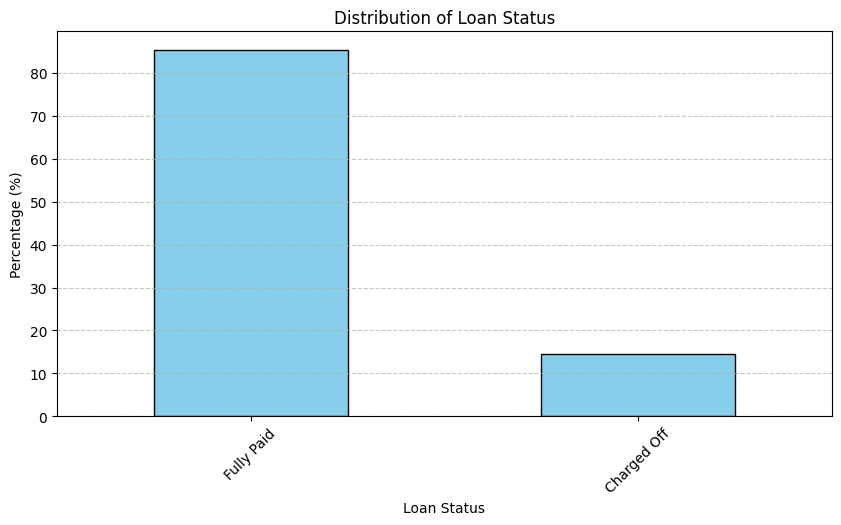

In [30]:
# Calculate the percentage distribution of loan_status between charged off and Fully paid
loan_status_dist = loan_data["loan_status"].value_counts(normalize=True) * 100
print(loan_status_dist)
# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 5))
loan_status_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Outlier Summary:
loan_amnt: 1088 outliers removed.
int_rate: 66 outliers removed.
annual_inc: 1654 outliers removed.
delinq_2yrs: 3842 outliers removed.
inq_last_6mths: 2862 outliers removed.
open_acc: 926 outliers removed.
total_acc: 403 outliers removed.
issue_d_year: 1228 outliers removed.
Original DataFrame Shape: (38577, 24)
Cleaned DataFrame Shape: (26508, 24)


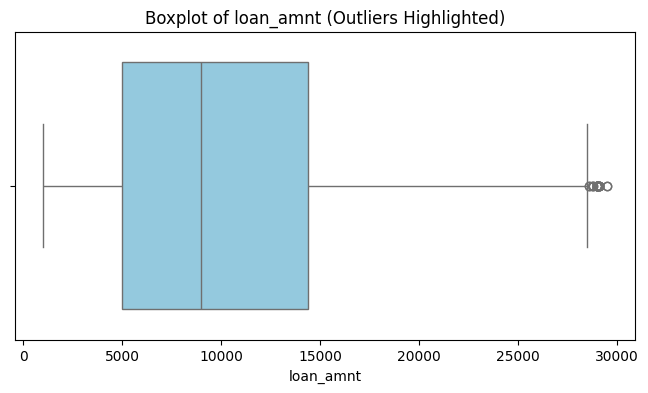

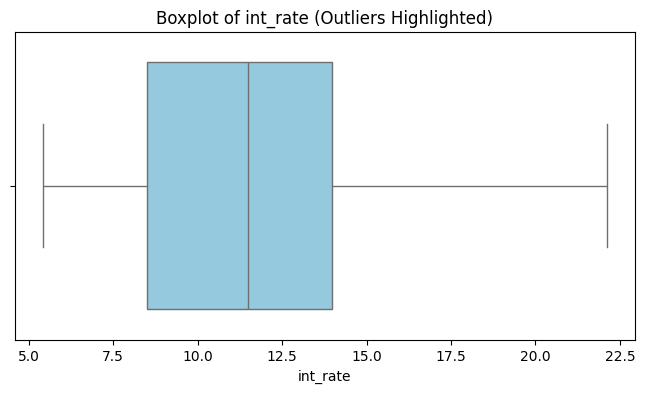

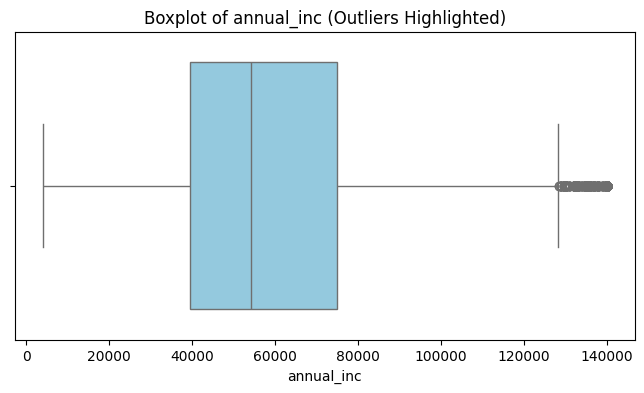

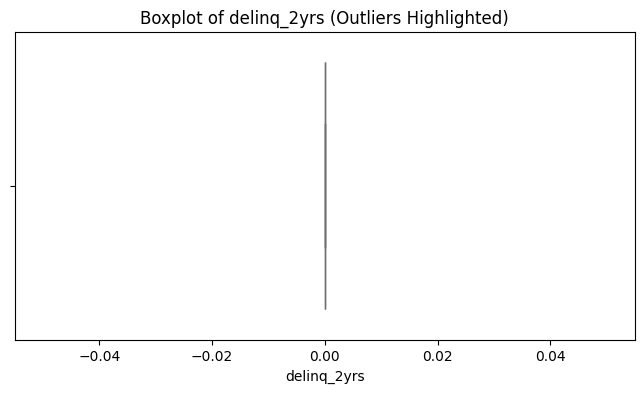

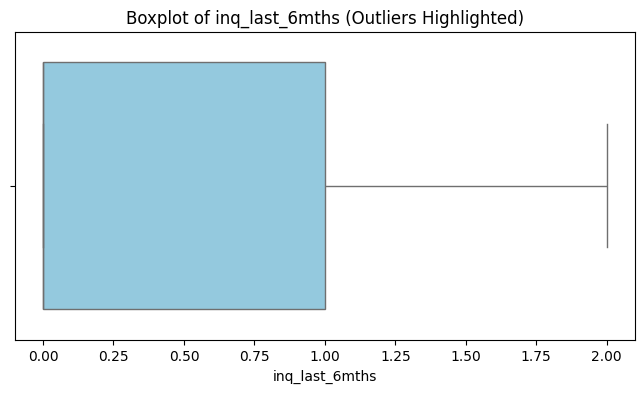

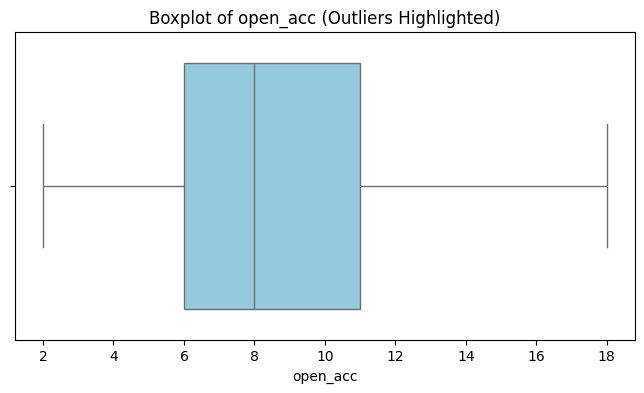

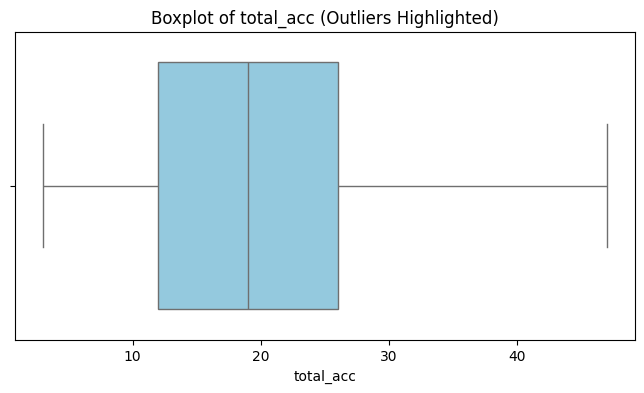

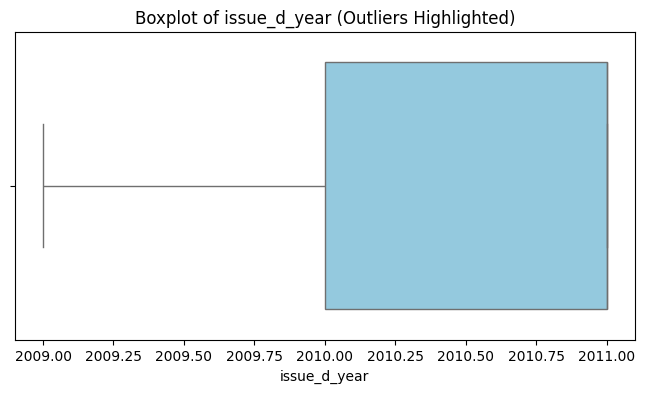

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def find_and_remove_outliers(df, columns):
    """
    Identifies and removes outliers from the specified columns of a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of numeric columns to check for outliers.

    Returns:
        pd.DataFrame: A DataFrame with outliers removed.
        dict: A dictionary containing the count of outliers for each column.
    """
    outlier_summary = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First Quartile
        Q3 = df[col].quantile(0.75)  # Third Quartile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify rows with outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outlier_summary[col] = len(outliers)  # Store the count of outliers
            # Remove outliers from the DataFrame
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df, outlier_summary


# Step 1: Identify numeric columns
numeric_columns = loan_data.select_dtypes(include=['number']).columns

# Step 2: Find and remove outliers
loan_data_cleaned, outlier_summary = find_and_remove_outliers(loan_data, numeric_columns)

# Step 3: Display outlier summary
print("Outlier Summary:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers removed.")

# Step 4: Display DataFrame shape changes
print(f"Original DataFrame Shape: {loan_data.shape}")
print(f"Cleaned DataFrame Shape: {loan_data_cleaned.shape}")

# Step 5: Visualize boxplots for columns with outliers
for col, count in outlier_summary.items():
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=loan_data_cleaned[col], color='skyblue')
    plt.title(f"Boxplot of {col} (Outliers Highlighted)")
    plt.xlabel(col)
    plt.show()


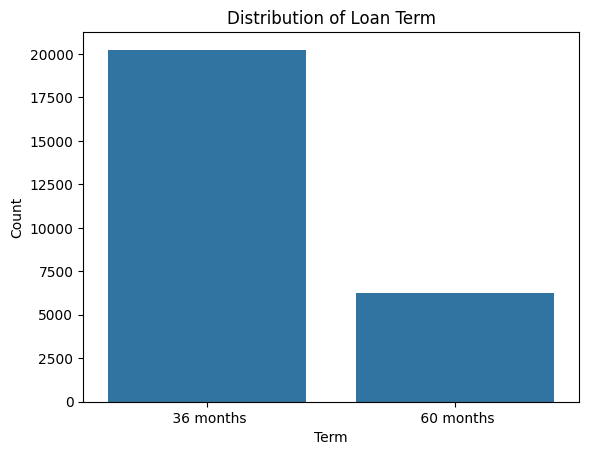

In [32]:
#checking which term most borrowers are perfered(or taken)
sns.countplot(data=loan_data_cleaned, x='term')


# Display the difference with the plot
plt.title('Distribution of Loan Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

#Insights:
#Most term loan have taken in 36 months than 60 months term

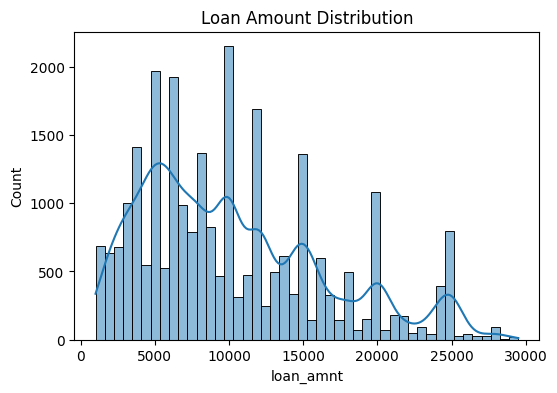

In [33]:
#Checking the most loan amount distribution 

# Loan amount distribution
plt.figure(figsize=(6, 4))
sns.histplot(loan_data_cleaned['loan_amnt'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

#Insights:

#MOst loans are relying on 5000 and 10000 beyond 1500 count

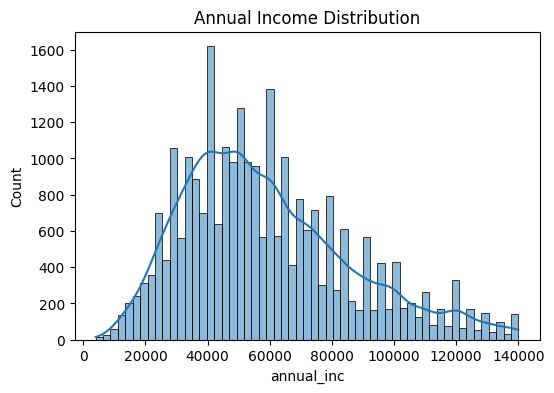

In [34]:
# Income distribution on annual income's of borrower
plt.figure(figsize=(6, 4))
sns.histplot(loan_data_cleaned['annual_inc'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

#Insights:

#Most annual income relying on the 40000 and 60000 with the count of 1400 above from the visualization

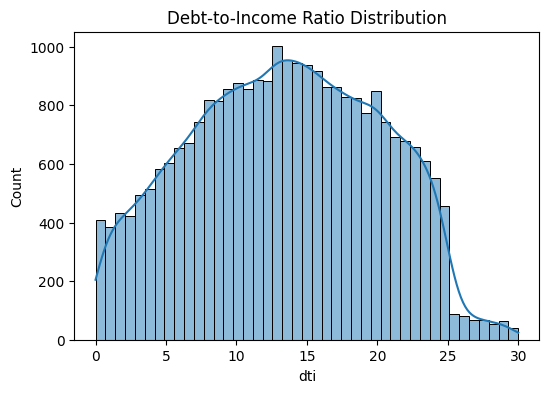

In [35]:
# Debt-to-Income Ratio Distribution
plt.figure(figsize=(6, 4))
sns.histplot(loan_data_cleaned['dti'], kde=True)
plt.title('Debt-to-Income Ratio Distribution')
plt.show()

#Most DTI ratio distribution spread across 10 to 20 beyond the count of 800 above evenly if take it

# Deep Insights Visualization with both Univariate and Bi-variate Analaysis

In [36]:
#Now will focus much deep analysis on creating groups (bins) for each individual column without comparing them against another variable
# Define column-specific binning details in a dictionary
binning_details = {
    'int_rate': {'bins': 5, 'labels': ['5%-9%', '9%-13%', '13%-17%', '17%-21%', '21%-24%']},
    'open_acc': {'bins': 5, 'labels': ['2-10', '10-19', '19-27', '27-36', '36-44']},
    'revol_util': {'bins': 5, 'labels': ['0-20', '20-40', '40-60', '60-80', '80-100']},
    'total_acc': {'bins': 5, 'labels': ['2-20', '20-37', '37-55', '55-74', '74-90']},
    'annual_inc': {'bins': 5, 'labels': ['3k-31k', '31k-58k', '58k-85k', '85k-112k', '112k-140k']},
    'loan_amnt': {'bins': 7, 'labels': ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k']},
    'dti': {'bins': 5, 'labels': ['0-6', '6-12', '12-18', '18-24', '24-30']}
}

# Dynamically apply pd.cut to each column based on the binning details
for col, details in binning_details.items():
    bin_count = details['bins']
    labels = details['labels']
    group_column_name = f"{col}_groups"
    loan_data_cleaned[group_column_name] = pd.cut(loan_data_cleaned[col], bins=bin_count, precision=0, labels=labels)

loan_data_cleaned.head()


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,issue_d_year,issue_d_month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,loan_amnt_groups,dti_groups
0,5000,36 months,10.65,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,83.70,9,2011,12,9%-13%,2-10,80-100,2-20,3k-31k,0-5k,24-30
2,2400,36 months,15.96,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,98.50,10,2011,12,17%-21%,2-10,80-100,2-20,3k-31k,0-5k,6-12
3,10000,36 months,13.49,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,21.00,37,2011,12,13%-17%,19-27,20-40,55-74,31k-58k,10k-15k,18-24
6,7000,60 months,15.96,C,C5,8,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,85.60,11,2011,12,17%-21%,10-19,80-100,2-20,31k-58k,5k-10k,18-24
7,3000,36 months,18.64,E,E1,9,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,87.50,4,2011,12,17%-21%,2-10,80-100,2-20,31k-58k,0-5k,0-6


In [37]:
# Define column-specific binning details in a dictionary
binning_details = {
    'int_rate': {'bins': 5},
    'open_acc': {'bins': 5},
    'revol_util': {'bins': 5},
    'total_acc': {'bins': 5},
    'annual_inc': {'bins': 5, 'labels': ['3k-31k', '31k-58k', '58k-85k', '85k-112k', '112k-140k']},
    'loan_amnt': {'bins': 7, 'labels': ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k']},
    'dti': {'bins': 5}
}

# Dynamically apply pd.cut to each column based on the binning details
for col, details in binning_details.items():
    bin_count = details['bins']
    
    # Check if 'labels' exists, otherwise set to None
    labels = details.get('labels', None)
    
    # Create a group column name based on the column being processed
    group_column_name = f"{col}_groups"
    
    # Apply pd.cut with or without labels
    if labels:
        loan_data_cleaned[group_column_name] = pd.cut(loan_data_cleaned[col], bins=bin_count, precision=0, labels=labels)
    else:
        loan_data_cleaned[group_column_name] = pd.cut(loan_data_cleaned[col], bins=bin_count, precision=0)

loan_data_cleaned.head()


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,issue_d_year,issue_d_month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,loan_amnt_groups,dti_groups
0,5000,36 months,10.65,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,83.70,9,2011,12,"(9.0, 12.0]","(2.0, 5.0]","(80.0, 100.0]","(3.0, 12.0]",3k-31k,0-5k,"(24.0, 30.0]"
2,2400,36 months,15.96,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,98.50,10,2011,12,"(15.0, 19.0]","(2.0, 5.0]","(80.0, 100.0]","(3.0, 12.0]",3k-31k,0-5k,"(6.0, 12.0]"
3,10000,36 months,13.49,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,21.00,37,2011,12,"(12.0, 15.0]","(8.0, 12.0]","(20.0, 40.0]","(29.0, 38.0]",31k-58k,10k-15k,"(18.0, 24.0]"
6,7000,60 months,15.96,C,C5,8,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,85.60,11,2011,12,"(15.0, 19.0]","(5.0, 8.0]","(80.0, 100.0]","(3.0, 12.0]",31k-58k,5k-10k,"(18.0, 24.0]"
7,3000,36 months,18.64,E,E1,9,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,87.50,4,2011,12,"(15.0, 19.0]","(2.0, 5.0]","(80.0, 100.0]","(3.0, 12.0]",31k-58k,0-5k,"(-0.0, 6.0]"


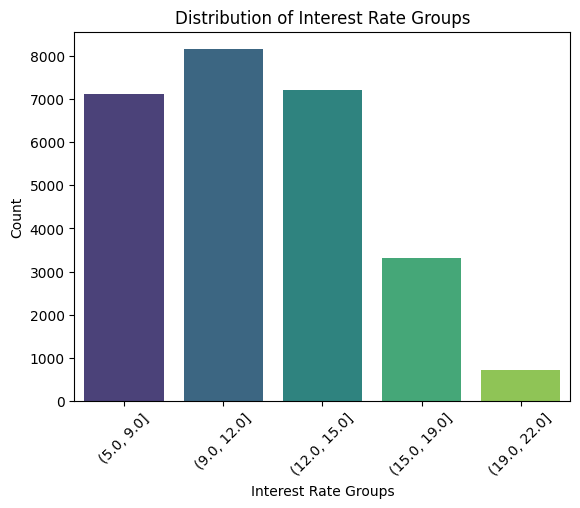

In [38]:
#To understand the count of records within each bin, which helps in identifying skewed or underrepresented groups.
sns.countplot(x='int_rate_groups', data=loan_data_cleaned, palette='viridis')
plt.title("Distribution of Interest Rate Groups")
plt.xlabel("Interest Rate Groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#Insights:
#This plot gives an overview of how interest rates are distributed across the dataset. 
#It helps in identifying if certain bins have significantly more or fewer entries, which could influence risk assessment.



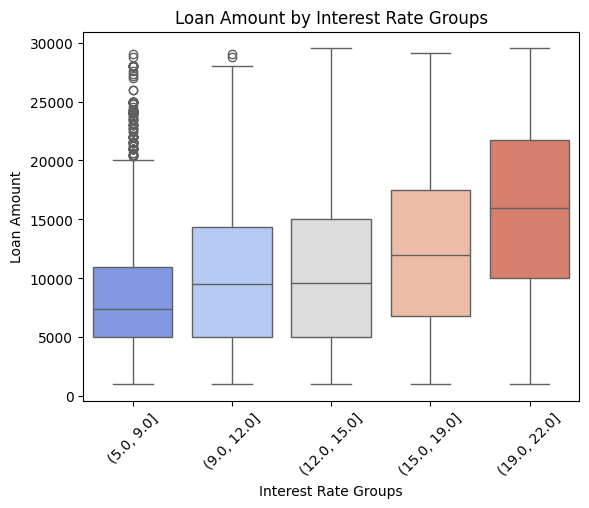

In [39]:
#To compare the distribution of loan amounts for each interest rate group and identify potential outliers or trends.

sns.boxplot(x='int_rate_groups', y='loan_amnt', data=loan_data_cleaned, palette='coolwarm')
plt.title("Loan Amount by Interest Rate Groups")
plt.xlabel("Interest Rate Groups")
plt.ylabel("Loan Amount")
plt.xticks(rotation=45)
plt.show()

#Insights:
#This helps in understanding the typical loan amount for each interest rate range and whether certain interest rate groups are associated with higher or lower loan amounts.



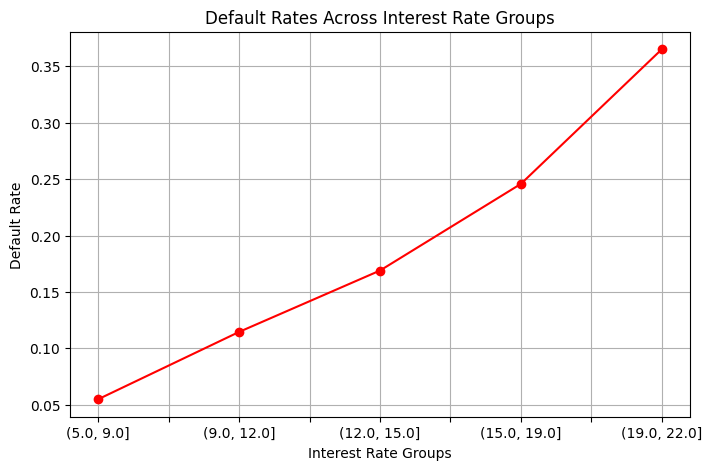

In [40]:
#To track the proportion of defaults within each interest rate group, providing insights into risk levels for lending.
default_rate = loan_data_cleaned.groupby('int_rate_groups')['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean()
)

default_rate.plot(kind='line', marker='o', figsize=(8, 5), color='red')
plt.title("Default Rates Across Interest Rate Groups")
plt.xlabel("Interest Rate Groups")
plt.ylabel("Default Rate")
plt.grid()
plt.show()

#Insights:
#This visualization is critical for assessing financial risk, as it highlights which interest rate groups have the highest likelihood of default

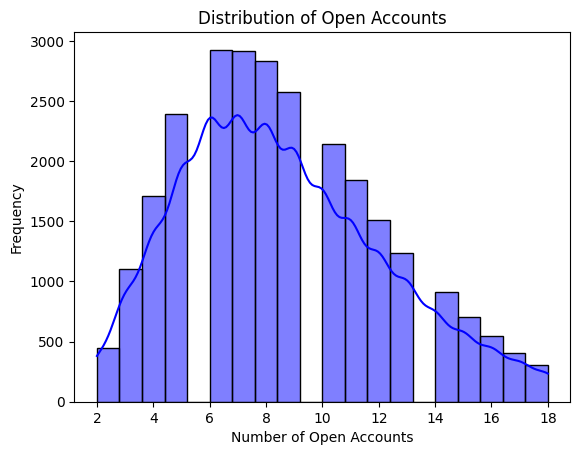

In [41]:
#To understand the overall distribution of open accounts in the dataset.
sns.histplot(loan_data_cleaned['open_acc'], bins=20, kde=True, color='blue')
plt.title("Distribution of Open Accounts")
plt.xlabel("Number of Open Accounts")
plt.ylabel("Frequency")
plt.show()

#Insights:
#This plot reveals if most borrowers have a small or large number of open accounts. It can help identify trends like borrowers with many accounts being more or less risky.



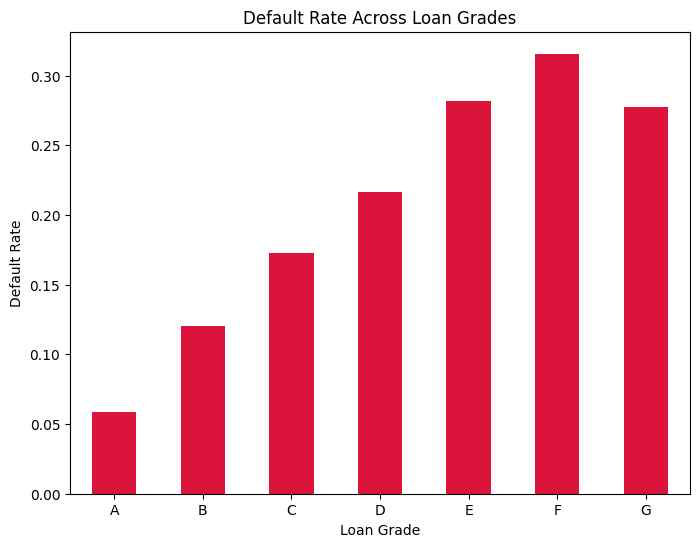

In [42]:
# Calculate default rate for each grade
default_rate = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('grade').size() / loan_data_cleaned.groupby('grade').size()

# Plot the default rates
default_rate.plot(kind='bar', color='crimson', figsize=(8, 6))
plt.title("Default Rate Across Loan Grades")
plt.xlabel("Loan Grade")
plt.ylabel("Default Rate")
plt.xticks(rotation=0)
plt.show()

#Insights:
#If the bars for 'E', 'F', or 'G' are significantly higher, these grades represent high-risk borrowers.
#If 'A' and 'B' grades have minimal default rates, these are safer borrower categories, suitable for low-risk lending strategies.


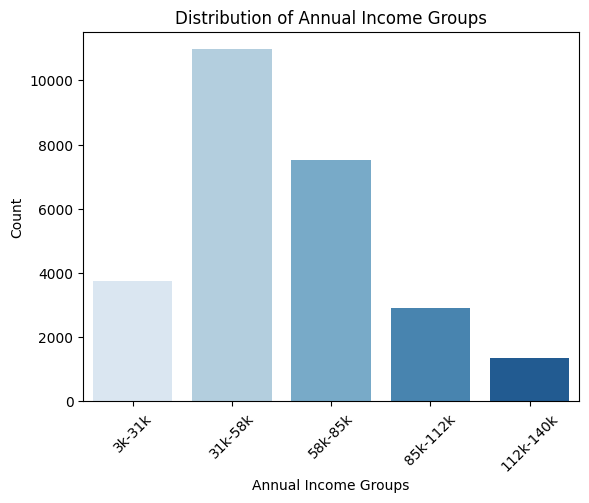

In [43]:
#To visualize how borrowers are distributed across income groups.
sns.countplot(x='annual_inc_groups', data=loan_data_cleaned, palette='Blues')
plt.title("Distribution of Annual Income Groups")
plt.xlabel("Annual Income Groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#Insights
#This helps assess the income levels of the majority of borrowers and whether there’s a concentration of high or low-income earners.

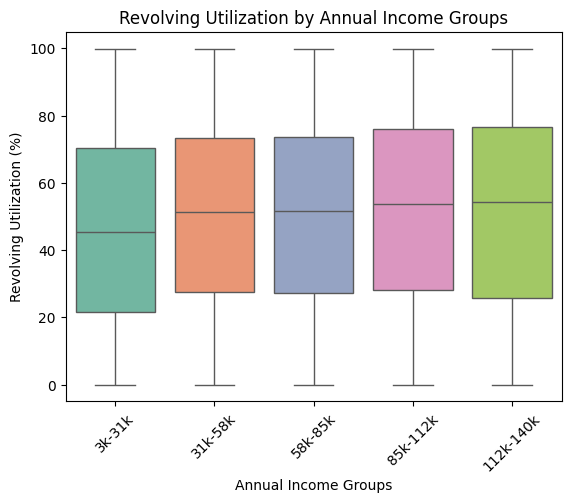

Group with highest median revolving credit utilization: 112k-140k
Group with highest mean revolving credit utilization: 85k-112k
                     count  mean   std  min   25%   50%   75%   max
annual_inc_groups                                                  
3k-31k             3768.00 46.32 29.05 0.00 21.60 45.30 70.30 99.90
31k-58k           10962.00 50.27 28.00 0.00 27.50 51.40 73.30 99.90
58k-85k            7511.00 50.59 28.10 0.00 27.40 51.60 73.70 99.90
85k-112k           2923.00 51.49 28.65 0.00 28.05 53.60 75.90 99.90
112k-140k          1344.00 51.06 29.73 0.00 25.85 54.20 76.70 99.90


In [44]:
#Purpose: To compare the levels of revolving credit utilization among different income groups.


sns.boxplot(x='annual_inc_groups', y='revol_util', data=loan_data_cleaned, palette='Set2')
plt.title("Revolving Utilization by Annual Income Groups")
plt.xlabel("Annual Income Groups")
plt.ylabel("Revolving Utilization (%)")
plt.xticks(rotation=45)
plt.show()

# Group by 'annual_inc_groups' and calculate summary statistics for 'revol_util'
revol_util_analysis = loan_data_cleaned.groupby('annual_inc_groups')['revol_util'].describe()

# Display the groups with the highest median and mean revolving credit utilization
most_utilized_group_median = revol_util_analysis['50%'].idxmax()
most_utilized_group_mean = revol_util_analysis['mean'].idxmax()

print(f"Group with highest median revolving credit utilization: {most_utilized_group_median}")
print(f"Group with highest mean revolving credit utilization: {most_utilized_group_mean}")

# Display the full descriptive statistics for reference
print(revol_util_analysis)

#Insights:
#This provides insights into how much of their credit limit borrowers use, categorized by income groups, which can indicate financial stress levels.

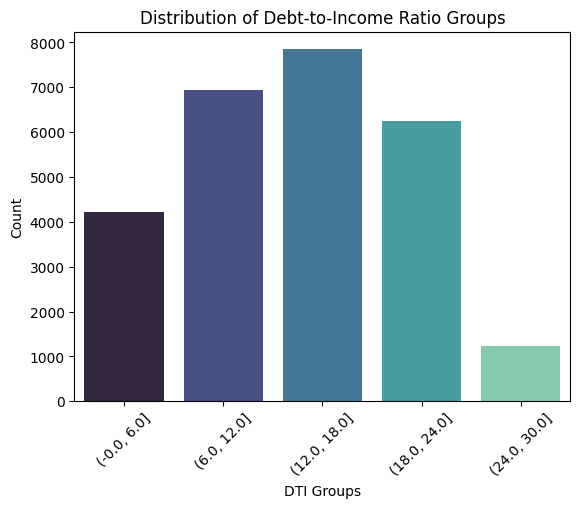

Percentage distribution of borrowers across DTI groups:
dti_groups
(-0.0, 6.0]    15.95
(6.0, 12.0]    26.22
(12.0, 18.0]   29.61
(18.0, 24.0]   23.55
(24.0, 30.0]    4.68
Name: proportion, dtype: float64

The most common DTI group is: (12.0, 18.0], with 29.61% of borrowers.


In [45]:
# To examine how borrowers are distributed based on their debt-to-income ratio (DTI).


sns.countplot(x='dti_groups', data=loan_data_cleaned, palette='mako')
plt.title("Distribution of Debt-to-Income Ratio Groups")
plt.xlabel("DTI Groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Calculate the count and percentage distribution of borrowers in each DTI group
dti_distribution = loan_data_cleaned['dti_groups'].value_counts(normalize=True) * 100

# Sort for a clearer view
dti_distribution_sorted = dti_distribution.sort_index()

# Display the DTI group with the highest borrower count
most_common_dti_group = dti_distribution_sorted.idxmax()

print("Percentage distribution of borrowers across DTI groups:")
print(dti_distribution_sorted)

print(f"\nThe most common DTI group is: {most_common_dti_group}, with {dti_distribution_sorted[most_common_dti_group]:.2f}% of borrowers.")

#Insights:
#This plot highlights whether borrowers generally have a high or low debt burden relative to their income, a crucial indicator for lending decisions.

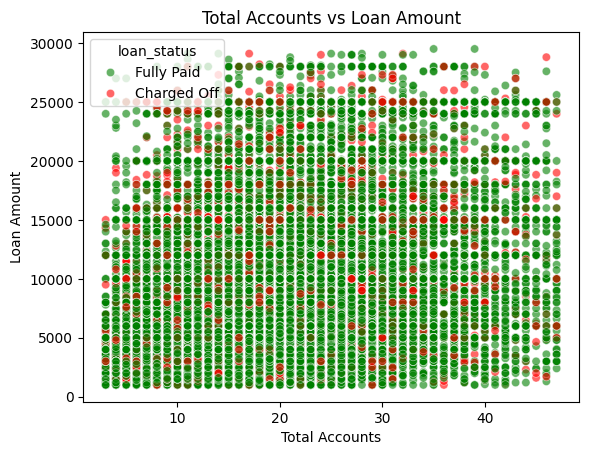

In [46]:
# Scatter plot with color distinction for loan_status and explore the relationship between total accounts and loan amounts.
sns.scatterplot(x='total_acc', y='loan_amnt', data=loan_data_cleaned, hue='loan_status', 
                palette={'Fully Paid': 'green', 'Charged Off': 'red', 'Late (31-120 days)': 'orange', 'Default': 'blue'},
                alpha=0.6)

# Title and labels
plt.title("Total Accounts vs Loan Amount")
plt.xlabel("Total Accounts")
plt.ylabel("Loan Amount")

# Show the plot
plt.show()

#Insights:
#This visualization helps identify if there’s a trend between the number of total accounts and the size of loans taken.



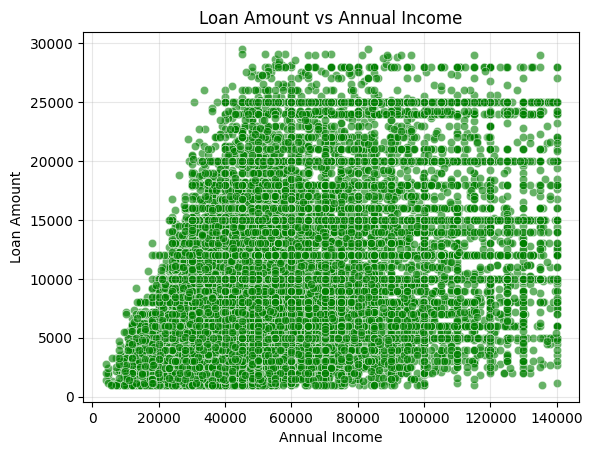

In [47]:
#Loan Amount vs Annual Income (Scatter Plot) how loan amounts vary with annual income.
sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan_data_cleaned, alpha=0.6, color='green')
plt.title("Loan Amount vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.grid(alpha=0.3)
plt.show()

#Insights:
#Higher incomes are often associated with higher loan amounts.
#Look for outliers, such as low-income borrowers with large loans, as potential risks.

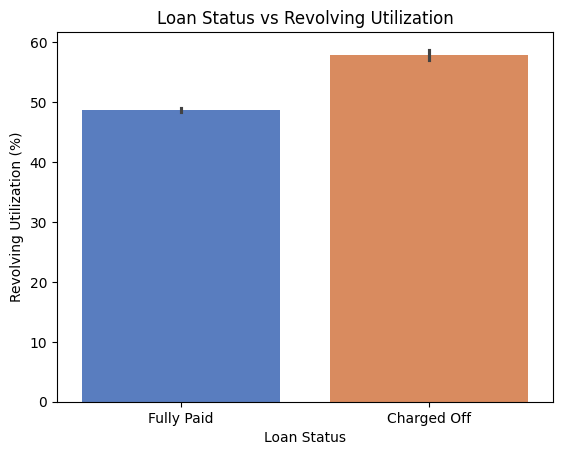

Average Revolving Utilization by Loan Status:
loan_status
Fully Paid    48.72
Charged Off   57.87
Name: revol_util, dtype: float64

Difference in revolving utilization between Charged Off and Fully Paid loans: 9.14%


In [48]:
#Loan Status vs Revolving Utilization (Bar Plot) as compares average revolving utilization for each loan status.
sns.barplot(x='loan_status', y='revol_util', data=loan_data_cleaned, palette='muted')
plt.title("Loan Status vs Revolving Utilization")
plt.xlabel("Loan Status")
plt.ylabel("Revolving Utilization (%)")
plt.show()

# Calculate the average revolving utilization by loan status
avg_revol_util_by_status = loan_data_cleaned.groupby('loan_status')['revol_util'].mean().sort_values()

# Display the results
print("Average Revolving Utilization by Loan Status:")
print(avg_revol_util_by_status)

# Highlight the difference between Fully Paid and Charged Off
fully_paid_avg = avg_revol_util_by_status['Fully Paid']
charged_off_avg = avg_revol_util_by_status['Charged Off']
difference = charged_off_avg - fully_paid_avg

print(f"\nDifference in revolving utilization between Charged Off and Fully Paid loans: {difference:.2f}%")


#Insights:
#Higher utilization rates are often associated with Charged Off loans.
#This can indicate financial strain in borrowers.


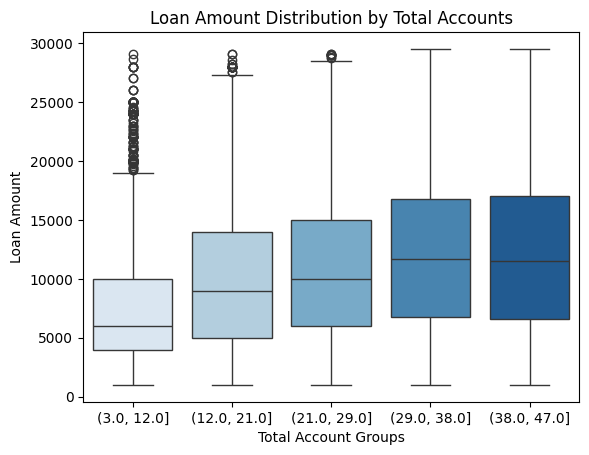

In [49]:
#Loan Amount Distribution by Total Accounts (Box Plot) to examine how loan amounts vary across groups of total accounts.
sns.boxplot(x='total_acc_groups', y='loan_amnt', data=loan_data_cleaned, palette='Blues')
plt.title("Loan Amount Distribution by Total Accounts")
plt.xlabel("Total Account Groups")
plt.ylabel("Loan Amount")
plt.show()

#Insights:
#Borrowers with more accounts generally qualify for larger loans.
#Helps in understanding how credit history impacts loan amounts.